In [4]:
# Las librerías indispensables
#%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation

# Modelo de una neurona (perceptrón)

Definiremos lo que llamaremos como "una neurona" en inteligencia artificial, en base a lo que esta realiza de forma matemática. En forma secuencial, la neurona recibe las entradas, les aplica una transformación afin, es decir, una combinación lineal con un peso libre o también llamado "sesgo" para finalmente a dicho resultado aplicar una función no lineal.

Escrito de forma matemática, si la entrada para la neurona es un vector n-dimensional $\vec{x}$, entonces la salida del combinador lineal es

$$s = \vec{x}\cdot \vec{w} + b_0 ,$$

donde $b_0$ es el sesgo y $\vec{w}$ es el vector de pesos.

A dicha salida "s", se le aplica una función no lineal, usualmente la función sigmoidal, esta y su derivada es

$$y(s) = sgm(s) = \frac{1}{1+e^{-s}} \implies sgm'(s) = \frac{e^{-s}}{(1+e^{-s})^2}  = sgm(s)(1-sgm(s))$$

Este resultado "$y$" es lo que la neurona retorna como salida.

En problemas de clasificación de clases (por ejemplo, identificar gatos (clase 1) y perros (clase 0)) , diremos que se identifica la clase 1 si es que su salida es mayor que 0.5 , en caso contrario la neurona detecta la clase 0. Aquí una imágen que ilustra lo anterior.

![image.png](https://live.staticflickr.com/65535/51549981077_3a7a520c81_b.jpg)



#  Aprendizaje supervisado para modelo de una única neurona

Supongamos que tenemos dos clases, la clase 1 y la clase 0, que queremos que una neurona aprenda a identificar. Para hacer esto en el contexto del aprendizaje supervisado, necesitamos tener un conjunto de entrenamiento en el que ya sepamos sus clasificaciones. Así, cada dato de entrada tendrá asociado su respectivo valor (1 o 0) según la clase a la que pertenezca. Esto nos permite definir un "error de clasificación". Existen muchas formas de hacer esto último y el cómo se escoge dicha función depende directamente del tipo de problema que queramos resolver. En este pequeño notebook veremos un ejemplo clásico que utiliza el "error cuadrático medio" como forma de evaluar el desempeño de la neurona. Dicho error se define como:

$$E = (t-y)^2 ,$$

donde "$t$" es la clase correcta de la entrada (0 o 1) , mientras que "$y$" es la salida de la neurona después de aplicar la función no-lineal. Así si $t=1$ esperamos que la neurona arroje como salida algún valor cercano a 1 (o al menos mayor que 0.5).

La neurona solo puede cambiar sus pesos, es decir, el vector $\vec{w}$ y el sesgo $b_0$. Así, podemos entender que el error que comete la neurona es una función exclusivamente de los pesos!

Es en este momento cuando el gradiente hace su aparición (redoble de tambores mentales). Consideremos una función $f:\mathbb{R}^n \rightarrow  \mathbb{R}$, con su respectivo gradiente $\nabla f(\vec{x})$, de este último sabemos que su dirección apunta en la dirección de máximo ascenso de $f$. Así, si quiero aumentar el valor de $f$, debería desplazarme siguiendo $\nabla f$. De forma contraria, si quiero disminuír $f$, debería seguir la dirección opuesta, es decir, $-\nabla f$, esta será la dirección de máximo descenso. Esto permite generar una regla de optimización, digamos que quiero minimizar una función $f$ siguiendo mi gradiente, puedo desplazarme a pequeños pasos, que diremos que su valor es $\mu$, y partiendo de un $f(\vec{x_0})$, el siguiente paso que doy, el siguiente $\vec{x_1}$ que irá minimizando $f$ será:

$$\vec{x_1} = \vec{x_0} - \mu \nabla f(\vec{x_0}) $$

así me voy desplazando de forma que voy tratando de minimizar mi función $f$. Esto lo puedo aplicar $n$ veces, obteniendo que:

$$\vec{x_{n+1}} = \vec{x_n} - \mu \nabla f(\vec{x_n}) $$

Esta regla iterativa es muy común en algoritmos de optimización numérica y lo mejor de todo es que puede ser bastante sencilla de aplicar si conocemos la función en cuestión. Este mismo concepto se utiliza para actualizar los pesos de la neurona de forma que se minimice la función de error utilizada, donde, considerando que los pesos son nuestras variables independientes, los "nuevos" pesos, después de seguir $n$ iteraciones serán:

$$\vec{w_{n+1}} = \vec{w_{n}} - \mu \nabla E(\vec{w_n}) $$

En este contexto, $\mu$ es lo que se conoce como un taza de aprendizaje y se le considera un "híper-parámetro".  Lo dejaremos constante para efectos de esta demostración y será determinado de forma arbitraria. Como "regla", el $\mu$ escogido debe ser lo suficientemente pequeño para que "los saltos" entre cada iteración permitan llegar al mínimo, pero tampoco debe ser lo suficientemente grande para que el tiempo de ejecución del algoritmo, la convergencia a los pesos óptimos, se llegue en un tiempo razonable.  

## Caso entrada unidimensional y la matemática detrás

Supongamos que la salida $s$ del combinador lineal, para el caso en que la entrada es unidimensional será

$$s = w_1 \cdot x + w_0 $$

Allí tenemos solo que ajustar $w_1$ y $w_0$. Con esto, queremos encontrar el gradiente del error cuadrático medio con respecto a los pesos. Entonces, nos gustaría calcular $\frac{\partial E}{\partial w_i}$ para obtener el gradiente. Para ello nos aprovechamos de la regla de la cadena.

$$\frac{\partial E}{\partial w_i}  = \frac{\partial E}{\partial y}\frac{\partial y}{\partial s}\frac{\partial s}{\partial w_i} $$

donde

$$\frac{\partial E}{\partial y} = \frac{\partial (t-y)^2}{\partial y} = -2(t-y) \; \wedge  \; \frac{\partial y}{\partial s} = \frac{\partial sgm(s)}{\partial s}= sgm(s)(1-sgm(s)) $$

y

$$\frac{\partial s}{\partial w_0} = 1 \; \wedge \; \frac{\partial s}{\partial w_1} = x $$

Por lo tanto, en la iteración $k+1$, los pesos $w_0$ y $w_1$ cambian siguiendo la regla:

$$\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}_{k+1} =\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}_{k} + 2\mu(t-sgm(s_k))sgm(s_k)(1-sgm(s_k))\begin{bmatrix}
1 \\
x_k
\end{bmatrix}$$

con $s_k = (w_1)_k x_k + (w_0)_k$ allí entiéndase a $(w_i)_k$ como al peso $w_i$ en su iteración $k$-ésima.


## Algunos conceptos generales de inteligencia artificial y detalles del problema.

### Sobre el problema a resolver

Ahora tenemos todos los elementos para entrenar nuestra neurona. Para poner esto a prueba, debemos definir claramente un problema a resolver. En este caso tendremos 2 conjuntos de números aleatorios obtenidos de distribuciones normales con medias $\mu_1 = +1$ y $\mu_2=-1$ con igual desviación estándar $\sigma = +1$. Aquellos provenientes de la primera distribución serán la clase $1$ mientras que la otra será la clase $0$. Así, buscaremos que la neurona sea capaz de clasificar números entre la clase 1 y la clase 0. Como resultado esperado final, una buena aproximación sería, números cercanos a $-1$ debería ser clase 0, mientras que números cercanos a $+1$ será la clase 1.

### Conjuntos de entrenamiento, validación y testeo

Los siguientes conceptos aplican tanto para el caso de una única neurona como para modelos con miles de neuronas, es decir, redes neuronales.

El conjunto de entrenamiento será aquel conjunto que utilicemos para ajustar los pesos de la neurona, es decir, serán los datos con los que la neurona (o red neuronal) "aprenderá" a clasificar. Una práctica común para evaluar dicho entrenamiento es tener 2 conjuntos completamente distintos del conjunto de entrenamiento llamados de validación y de testeo.

El conjunto de validación se utiliza para medir el error del modelo sobre un conjunto que no es el de entrenamiento durante el entrenamiento, es una forma de medir que tan bien la neurona es capaz de predecir casos fuera de aquellos con los que está "aprendiendo", mide la capacidad de extrapolar de la neurona, es algo así como los controles de un curso, los cuales en teoría se utilizan para medir el progreso de les estudiantes a lo largo de un curso.

Por su parte, el conjunto de "test", también distinto al conjunto de validación y entrenamiento, no se utiliza durante el entrenamiento y la idea es que la neurona nunca verá dicho conjunto hasta que haya terminado de entrenar. Así, en el conjunto de test vemos de forma definitiva si nuestra neurona es capaz de resolver (o clasificar en nuestro caso) de forma exitosa el problema en cuestión, este conjunto viene a ser el examen de la neurona (o red neuronal), dado que evalúa al estudiante una vez terminado el curso en cuestión.

### Época vs iteración

Para entrenar la neurona procederemos como sigue:

 1. Para cada dato de entrenamiento calcularemos el cambio en los pesos, es decir, cuanto debemos sumarle a dichos pesos para actualizarlos, pero no actualizaremos los pesos en este instante, solo guardaremos dicho valor. Esto será una "iteración" sobre nuestra neurona.
 2. Una vez hayamos pasado por todo el conjunto de entrenamiento, tendremos medidos todos los cambios en los pesos. Allí tomaremos el promedio de los cambios en los pesos tanto para $w_0$ como $w_1$ y estos promedios los utilizaremos para actualizar nuestros pesos. Cada vez que se complete esto, diremos que ha pasado 1 "época" de entrenamiento.

 3. A modo de cuantificar como va evolucionando el modelo, se calculará el error promedio sobre el conjunto de entrenamiento y de validación, se guardarán dichos valores para poder observarlos al final del entrenamiento.

In [5]:
# Python es un lenguaje orientado a objetos, así que nos aprovecharemos de su poder
# para crear objetos y hacer operaciones con estos, o al menos eso en teoría.
# Yo lo haré usando objetos porque me dió la gana, ustedes pueden intentar hacerlo
# de otra forma si quieren.

class Neurona:
    def __init__(self, mu):
        # Iniciamos nuestra neurona
        self.mu = mu # taza de aprendizaje
        np.random.seed(24)                            # comente esta línea si quiere que los pesos iniciales cambien
        self.w0 = np.random.normal(loc=0, scale=2.0)  # escogemos unos pesos iniciales aleatorios
        self.w1 = np.random.normal(loc=0, scale=2.0)
        string = 'Se ha creado su neurona de forma exitosa. \nLos pesos iniciales son: '
        print(string +  'w_1 = {:.3f} y w_0 = {:.3f}'.format(self.w1, self.w0))

    def combinador_lineal(self, x):
        return self.w1*x + self.w0

    def sigmoide(self, s):
        # Definimos la función no lineal
        denom = 1 + np.exp(-s)
        return 1/denom

    def der_sgm(self, s):
        # Retorna la derivada de la función no lineal evaluado en "s".
        return self.sigmoide(s)*(1-self.sigmoide(s))

    def output(self, x):
        # Calcula la salida de la neurona para una entrada "x".
        s = self.combinador_lineal(x)
        return self.sigmoide(s)

    def error(self, x, t):
        # Calcula el error cuadrático medio que tiene la neurona
        # para clasificar una entrada "x" con clase "t".

        s = self.combinador_lineal(x)
        y = self.sigmoide(s)

        return (y-t)**2

    def delta_pesos(self, x, t):
        # Calcula el cambio en los pesos w_1 y w_0 según la entrada "x"
        # la clase asociada "t" que esta tenga.
        s = self.combinador_lineal(x)
        der = self.der_sgm(s)
        y = self.sigmoide(s)
        A = 2 * self.mu * (t - y) * der
        return np.array([A , A*x])

    def update_w(self, delta_w0, delta_w1):
        # Actualiza los pesos considerando un delta de pesos
        # calculado previamente.

        self.w0 += delta_w0
        self.w1 += delta_w1

    def clasificar(self, x):
        salida = self.output(x)
        if salida >= 0.5:
            return 1
        else:
            return 0

    def entrenar(self, entradas, clases, input_val, clases_val, n=1000):
        """
        Entrena nuestra la neurona considerando "n" épocas. Necesita que se le entregue
        el conjunto de entrenamiento y validación dado que retorna el historial de pesos
        y de errores de entrenamiento y validación.

        Input:
        entradas[np.ndarray]: arreglo de entradas.
        clases[np.ndarray]: arreglo que contiene las clases respectivas asociadas a las entradas.
        input_val[np.ndarray]: igual al arreglo de entradas para es del conjunto de validación.
        clases_val[np.ndarray]: arreglo de clases del conjunto de validación.
        n[int]: número de épocas.

        Output:
        history[np.ndarray]: matriz de donde las columnas poseen los pesos w0, w1 y los errores de
        entrenamiento y validación y la fila respectiva indica en la época asociada a dichos pesos y errores.
        """

        m = len(entradas)

        # En este arreglo guardaremos los pesos los errores de entrenamiento y
        # testeo a medida que entrena.

        history = np.zeros((n + 1,4))

        # Calculamos los errores iniciales
        error_0 = 0
        error_0_t = 0
        for j in range(m):
            error_0 += self.error(entradas[j], clases[j])
            error_0_t += self.error(input_val[j], clases_val[j])
        error_0 /= m
        error_0_t /= m

        # Guardamos pesos iniciales y error inicial
        history[0,:] = np.array([self.w0, self.w1, error_0, error_0_t])

        for i in range(n):
            # Calculamos el cambio de los pesos promedio pasando por todas las entradas.
            # Definimos un arreglo donde guardar dichos "delta" de pesos.
            arr_delta_pesos_w0 = np.zeros(m)
            arr_delta_pesos_w1 = np.zeros(m)
            for j in range(m):
                arr_delta_pesos_w0[j] , arr_delta_pesos_w1[j] = self.delta_pesos(entradas[j], clases[j])

            # Actualizamos los pesos tomando el promedio de los delta.
            delta_w0 = np.mean(arr_delta_pesos_w0)
            delta_w1 = np.mean(arr_delta_pesos_w1)

            self.update_w(delta_w0, delta_w1)

            # Se calcula el nuevo error luego de terminar la época de entrenamiento.
            error = 0
            error_t = 0
            for j in range(m):
                error += self.error(entradas[j], clases[j])
                error_t += self.error(input_val[j], clases_val[j])
            error /= m  # error promedio
            error_t/= m
            # Guardamos pesos y errores
            history[i+1,:] = np.array([self.w0, self.w1, error, error_t])

            # Cada 10 épocas dejamos un mensajito.
            if i % 100 == 0:
                print('Época n°: {} \nEl error promedio de la neurona es: {:.4f}'.format(i, error))

        return history


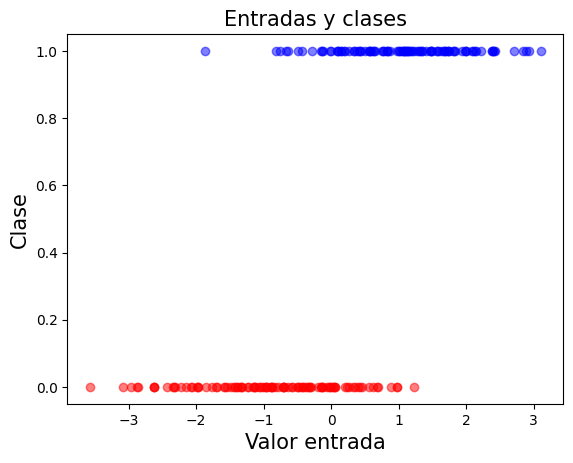

In [6]:
np.random.seed(24)
# Creamos entradas y clases utilizando distribuciones normales.

entradas0 = np.random.normal(loc=-1, scale=1., size=100) # entradas asociadas a la clase 0
entradas1 = np.random.normal(loc=1, scale=1., size=100) # entradas asociadas a la clase 1
entradas = np.append(entradas1, entradas0)

clases0 = np.zeros(100)
clases1 = np.ones(100)
clases = np.append(clases1,clases0)


# Conjunto de validación
input_val1 = np.random.normal(loc=-1, scale=1., size=100)
input_val2 = np.random.normal(loc=+1, scale=1., size=100)
clases_val1 = np.zeros(100)
clases_val2 = np.ones(100)

input_val = np.append(input_val2, input_val1)
clases_val = np.append(clases_val2, clases_val1)

# Ploteamos el conjunto de entrenamiento
plt.plot(entradas0, clases0, 'o', color='red', alpha=0.5)
plt.plot(entradas1, clases1, 'o', color='blue', alpha=0.5)
plt.xlabel('Valor entrada', fontsize=15)
plt.ylabel('Clase', fontsize=15)
plt.title('Entradas y clases', fontsize=15)
plt.show()

In [7]:
# Creamos la neurona Jimmy con taza de aprendizaje 0.1
Jimmy = Neurona(0.1)

# La entrenamos con 2000 épocas :D
datos = Jimmy.entrenar(entradas, clases, input_val, clases_val, n=2000)

Se ha creado su neurona de forma exitosa. 
Los pesos iniciales son: w_1 = -1.540 y w_0 = 2.658
Época n°: 0 
El error promedio de la neurona es: 0.5403
Época n°: 100 
El error promedio de la neurona es: 0.4740
Época n°: 200 
El error promedio de la neurona es: 0.4418
Época n°: 300 
El error promedio de la neurona es: 0.2712
Época n°: 400 
El error promedio de la neurona es: 0.1475
Época n°: 500 
El error promedio de la neurona es: 0.1244
Época n°: 600 
El error promedio de la neurona es: 0.1178
Época n°: 700 
El error promedio de la neurona es: 0.1155
Época n°: 800 
El error promedio de la neurona es: 0.1146
Época n°: 900 
El error promedio de la neurona es: 0.1142
Época n°: 1000 
El error promedio de la neurona es: 0.1139
Época n°: 1100 
El error promedio de la neurona es: 0.1138
Época n°: 1200 
El error promedio de la neurona es: 0.1137
Época n°: 1300 
El error promedio de la neurona es: 0.1136
Época n°: 1400 
El error promedio de la neurona es: 0.1136
Época n°: 1500 
El error promedi

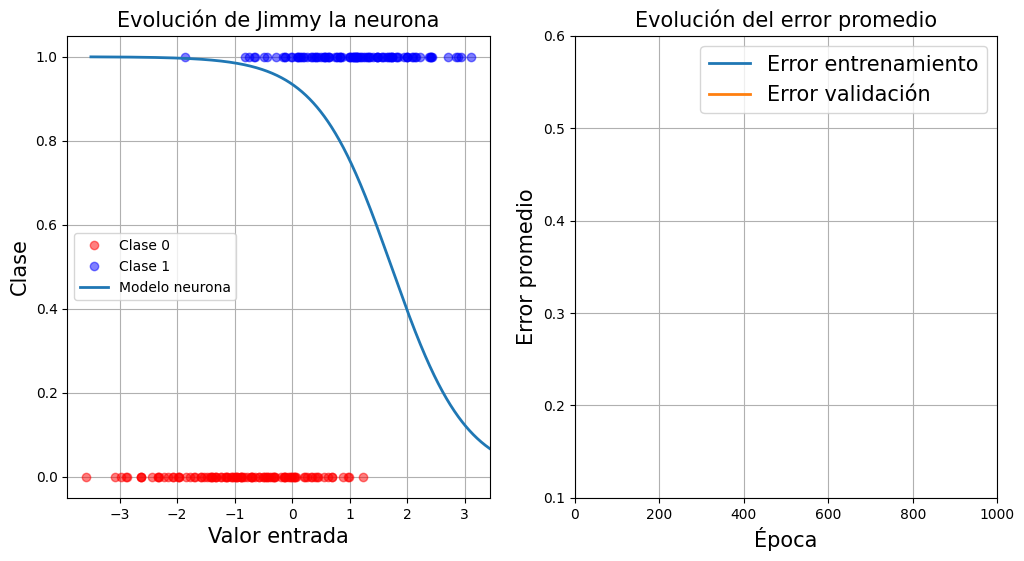

In [8]:
# A continuación se muestra la creación de la animación.
# No comentaré mucho al respecto de como funciona, pero para más detalle pueden revisar:
# https://www.geeksforgeeks.org/using-matplotlib-for-animations/

w0 = datos[:,0]
w1 = datos[:,1]
errores = datos[:,2]
errores_val = datos[:,3]

def salida_neurona(x,w0,w1):
    s = x*w1 + w0
    denom = np.exp(-s) + 1
    return 1/denom

# Veamos como evolucionó la neurona en cada época :D
fig = plt.figure(figsize=(12,6))        # Creación de figuras.
axis1 = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

axis2.set_xlim(0,1000)                  # Se fijan los límites de cada figura.
axis2.set_ylim(0.1,0.6)

# Inicialización del gráfico, así como adición de leyenda, nombres a los ejes, grilla y título.
axis1.plot(entradas0, clases0, 'o', color='red', alpha=0.5, label='Clase 0')
axis1.plot(entradas1, clases1, 'o', color='blue', alpha=0.5, label='Clase 1')
axis1.set_title('Evolución de Jimmy la neurona', fontsize=15)
axis1.set_xlabel('Valor entrada', fontsize=15)
axis1.set_ylabel('Clase', fontsize=15)
axis2.set_xlabel('Época', fontsize=15)
axis2.set_ylabel('Error promedio', fontsize=15)
axis2.set_title('Evolución del error promedio', fontsize=15)
axis1.grid()
axis2.grid()


# Creación de "líneas" a actualizar en cada frame de la animación.
line1, = axis1.plot([], [], lw = 2, label='Modelo neurona')
line2, = axis2.plot(0, errores[0], lw = 2, label='Error entrenamiento')
line3, = axis2.plot(0, errores_val[0], lw=2, label='Error validación')
axis2.legend(prop={'size':15})
axis1.legend()

# Esta función definen que se grafica en cada frame enumerado por "i"
def animate1(i):
    x = np.linspace(-3.5, 3.5, 1000)
    # Obtenemos la salida de la neurona para cada peso
    y = salida_neurona(x, w0[i], w1[i])
    line1.set_data(x, y)
    line2.set_data(np.arange(i+1), errores[0:i+1])
    line3.set_data(np.arange(i+1), errores_val[0:i+1])
    return line1,line2, line3

# Se ejecuta la animación.
anim = FuncAnimation(fig, animate1, frames = 1000, interval = 10, blit = True, repeat=True)
plt.show()

In [9]:
# Ahora podemos predecir nuevos valores también ;)
# Este es nuestro "testeo"
random_numeros = np.random.normal(loc=0, scale=2.0, size=10)  # creamos nuevos valores

for i in range(10):
    prediccion = Jimmy.clasificar(random_numeros[i])          # Le pedimos a Jimmy su predicción
    print('Entrada: {:.2f} --> Clase predicha = {}'.format(random_numeros[i], prediccion))

Entrada: -0.63 --> Clase predicha = 0
Entrada: -1.98 --> Clase predicha = 0
Entrada: -2.14 --> Clase predicha = 0
Entrada: -2.88 --> Clase predicha = 0
Entrada: 1.13 --> Clase predicha = 1
Entrada: 0.59 --> Clase predicha = 1
Entrada: -3.25 --> Clase predicha = 0
Entrada: 0.44 --> Clase predicha = 1
Entrada: 1.36 --> Clase predicha = 1
Entrada: 3.78 --> Clase predicha = 1
